In [23]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.style.use('ggplot')

In [24]:
df = pd.read_csv("kmeans.txt",sep="\t")

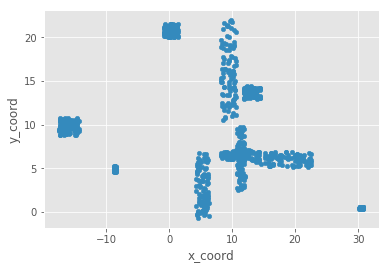

In [25]:
df.plot(kind='scatter', x='x_coord', y='y_coord')

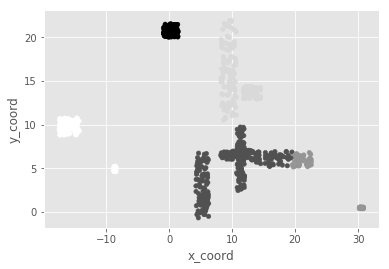

In [26]:
from sklearn.cluster import KMeans
kmeans_clusters = KMeans(5).fit_predict(X=np.array(df)[:,1:])
df.plot(kind='scatter', x='x_coord', y='y_coord', c=kmeans_clusters)

# Cluster using several values of k and plot the inertia at each

In [27]:
inertias = []
ks = np.arange(1,20)
for k in ks:
    inertias.append(KMeans(k).fit(X=np.array(df)[:,1:]).inertia_)
results = pd.DataFrame({"num_clusters": ks, "sum_distance": inertias})

# Visualizing this inertia value at each cluster number k

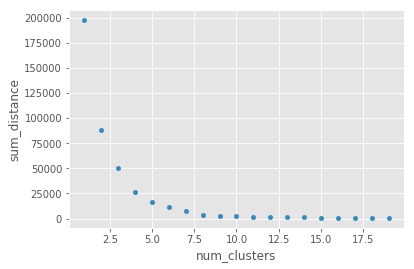

In [28]:
results.plot(kind='scatter', x='num_clusters', y='sum_distance')

This elbow indicates that after five clusters we do not significantly decrease the inertia

# Affinity propagation – automatically choosing cluster numbers

In [29]:
import sklearn
affinity_p_clusters = sklearn.cluster.AffinityPropagation().fit_predict(X=np.array(df)[:,1:]) 

In [30]:
len(np.unique(affinity_p_clusters))

437

## A histogram of the number of datapoints in each cluster

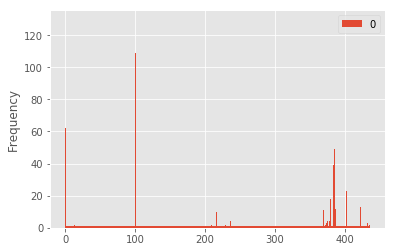

In [31]:
pd.DataFrame(affinity_p_clusters).plot(kind='hist',bins=np.unique(affinity_p_clusters))

#### Only a few clusters are large, while many points are identified as belonging to their own group